In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'pdf'
!mkdir -p $folder


data = pd.read_csv('data.csv', index_col=0)
data.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,0.5,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0.756519,0.123426,0.156010,0.397855,0.689124,0.822287,0.059486,0.032697,0.175249,0.673825
1,0.5,0.5,0.0,0.0,0.0,0,0,0,0,0,...,0.416175,0.688381,0.876422,0.153659,0.406306,0.714781,0.452631,0.890333,0.495503,0.194227
2,0.5,0.5,0.5,0.0,0.0,0,0,0,0,0,...,0.400526,0.012098,0.391870,0.681438,0.714112,0.587022,0.997617,0.179406,0.094149,0.551203
3,0.5,0.5,0.5,0.5,0.0,0,0,0,0,0,...,0.153326,0.399814,0.843777,0.106176,0.125045,0.765685,0.582473,0.797105,0.886579,0.486906
4,0.5,0.5,0.5,0.5,0.5,0,0,0,0,0,...,0.569110,0.288521,0.049904,0.312614,0.213312,0.666463,0.798311,0.552320,0.399732,0.078480


In [2]:
mean = data.mean()
variance = data.var()
stddev = data.std()

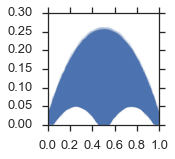

In [5]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(mean, variance, 'o', alpha=0.1)

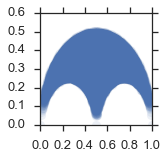

In [6]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(mean, stddev, 'o', alpha=0.1)

NameError: name 'var' is not defined

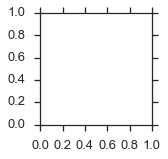

In [15]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.hexbin(mean, var)

In [7]:
import anchor

### Make shuffled data to compare to JSD

In [18]:
np.random.seed(sum(map(ord, 'beyonce')))
shuffled_data = data.copy()
shuffled_columns = np.random.permutation(data.columns)
shuffled_data = shuffled_data[shuffled_columns]
shuffled_data.columns = data.columns
shuffled_data.head()

,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise100_iter9,bimodal_92_noise100_iter9,bimodal_93_noise100_iter9,bimodal_94_noise100_iter9,bimodal_95_noise100_iter9,bimodal_96_noise100_iter9,bimodal_97_noise100_iter9,bimodal_98_noise100_iter9,perfect_included_noise100_iter9,perfect_excluded_noise100_iter9
0,1.000000,0,0.622234,0.637108,0.000000,0.889743,0,0.803556,0.000000,0,...,0.932852,0.264614,0.588628,0.756909,0.000000,0.000000,0.250492,1.000000,0.000000,1.000000
1,0.205484,0,0.768308,0.893993,0.978443,1.000000,1,0.127035,0.269371,0,...,0.724724,0.189781,1.000000,0.000000,0.000000,0.824932,0.701324,0.088347,0.783862,0.274544
2,0.118831,0,0.591002,0.492763,0.929639,0.839152,1,0.867767,0.000000,0,...,0.446803,0.311648,1.000000,0.000000,0.000000,0.000000,0.148938,1.000000,0.000000,0.790851
3,0.612001,0,0.426731,0.681949,0.000000,1.000000,1,0.982079,0.000000,0,...,1.000000,0.835272,1.000000,0.000000,0.508689,0.000000,0.000000,0.831429,0.000000,0.501660
4,0.745598,0,0.586912,0.796738,0.000000,0.591420,1,0.212199,0.000000,0,...,1.000000,0.450284,0.621685,0.000000,0.000000,0.000000,0.952146,1.000000,0.000000,0.892247


In [19]:
shuffled_data.to_csv('shuffled_data.csv')

### Calculate waypoints of shuffled data

In [23]:
# Initialize the waypoints transformer
ws = bonvoyage.Waypoints()

shuffled_waypoints = ws.fit_transform(shuffled_data)
six.print_(shuffled_waypoints.shape)
shuffled_waypoints.head()

(60300, 2)


,0,1
perfect_middle_noise0_iter0,0.05,0.22
middle0_00_noise0_iter0,0.22,0.00
middle0_01_noise0_iter0,0.09,0.08
middle0_02_noise0_iter0,0.06,0.09
middle0_03_noise0_iter0,0.19,0.39


In [24]:
shuffled_waypoints.to_csv('shuffled_waypoints.csv')

In [21]:
bins = np.arange(0, 1.1, .1)
six.print_(bins)


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [22]:
jsd = anchor.infotheory.binify_and_jsd(data, shuffled_data, 'data vs shuffled', bins)

In [35]:
jsd.head()

perfect_middle_noise0_iter0    0.694936
middle0_00_noise0_iter0        0.352927
middle0_01_noise0_iter0        0.820496
middle0_02_noise0_iter0        0.715798
middle0_03_noise0_iter0        0.883050
Name: data vs shuffled, dtype: float64

### Combine waypoints into one dataframe

In [25]:
waypoints = pd.read_csv('waypoints.csv', index_col=0)
waypoints.head()

,0,1
perfect_middle_noise0_iter0,0.00,0
middle0_00_noise0_iter0,0.01,0
middle0_01_noise0_iter0,0.02,0
middle0_02_noise0_iter0,0.03,0
middle0_03_noise0_iter0,0.04,0


In [28]:
waypoints.columns

Index([u'0', u'1', u'phenotype'], dtype='object')

In [29]:
shuffled_waypoints.columns

Index([0, 1, u'phenotype'], dtype='object')

In [30]:
waypoints.columns = shuffled_waypoints.columns

In [32]:
waypoints['phenotype'] = 'original'
shuffled_waypoints['phenotype'] = 'shuffled'

waypoints_combined = pd.concat([waypoints, shuffled_waypoints])
waypoints_combined = waypoints_combined.set_index('phenotype', append=True)
waypoints_combined.index = waypoints_combined.index.swaplevel(0, 1)
waypoints_combined = waypoints_combined.sort_index()
waypoints_combined.head()

0     1
phenotype                                      
original  bimodal_00_noise0_iter0    0.01  0.99
          bimodal_00_noise100_iter0  0.05  0.09
          bimodal_00_noise100_iter1  0.13  0.10
          bimodal_00_noise100_iter2  0.05  0.08
          bimodal_00_noise100_iter3  0.13  0.12

In [34]:
v = bonvoyage.Voyages()
voyages = v.voyages(waypoints_combined, [('original', 'shuffled')])

In [37]:
voyages.head()

,event_id,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition
0,bimodal_00_noise0_iter0,0.06,-0.57,0.573149,original,shuffled,$\searrow$,original-shuffled
1,bimodal_00_noise100_iter0,0.12,0.57,0.582495,original,shuffled,$\nearrow$,original-shuffled
2,bimodal_00_noise100_iter1,0.21,-0.09,0.228473,original,shuffled,$\searrow$,original-shuffled
3,bimodal_00_noise100_iter2,0.15,0.35,0.380789,original,shuffled,$\nearrow$,original-shuffled
4,bimodal_00_noise100_iter3,-0.10,0.53,0.539351,original,shuffled,$\nwarrow$,original-shuffled


In [38]:
voyages = voyages.set_index('event_id')
voyages.head()

,$\Delta x$,$\Delta y$,magnitude,group1,group2,direction,transition
event_id,,,,,,,
bimodal_00_noise0_iter0,0.06,-0.57,0.573149,original,shuffled,$\searrow$,original-shuffled
bimodal_00_noise100_iter0,0.12,0.57,0.582495,original,shuffled,$\nearrow$,original-shuffled
bimodal_00_noise100_iter1,0.21,-0.09,0.228473,original,shuffled,$\searrow$,original-shuffled
bimodal_00_noise100_iter2,0.15,0.35,0.380789,original,shuffled,$\nearrow$,original-shuffled
bimodal_00_noise100_iter3,-0.10,0.53,0.539351,original,shuffled,$\nwarrow$,original-shuffled


In [46]:
voyages['magnitude'].corr(jsd)

0.78220891220772926

In [47]:
jsd.corr(voyages['magnitude'])

0.78220891220772959

In [51]:
voyages['magnitude'].describe()

count    6.030000e+04
mean     3.379989e-01
std      2.144747e-01
min      3.878092e-09
25%      1.612452e-01
50%      3.041382e-01
75%      4.816638e-01
max      1.273106e+00
Name: magnitude, dtype: float64

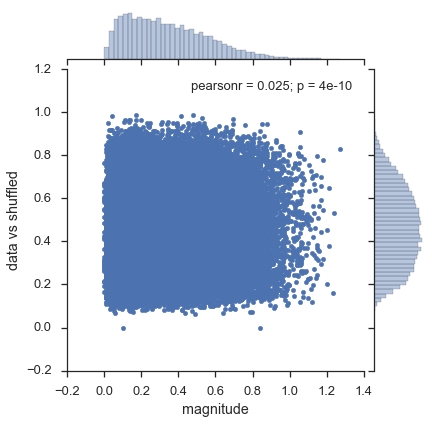

In [53]:
g = sns.jointplot(voyages['magnitude'], jsd,)

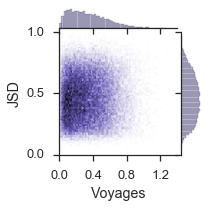

In [52]:
g = sns.jointplot(voyages['magnitude'], jsd, kind='hex', color='DarkSlateBlue', size=3, stat_func=None)
g.ax_joint.set(xlabel='Voyages', ylabel='JSD', xticks=(0, 0.4, 0.8, 1.2), yticks=(0, 0.5, 1))
g.savefig('{}/jsd_vs_voyages.pdf'.format(folder))